# Final Project

Topic: Based on lecture 14, develop two models of a mixed AND-OR gate:

(a) NFkB || (AP1 && IRF) and

(b) (NFkB || AP1) && IRF

Note that && stands for AND and || stands for OR, like in python.

Compare how the two models (a and b) respond to different
combinations of inputs. Identify the conditions in which they behave
the same way, and identify the conditions in which they behave
differently. Use graded inputs and also try time-varying inputs

In [ ]:
A || (B&A)

C = B &C
A || C

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec



**The following blocks are for part (a)**

In [3]:
#Alter this block to simulate part (a)

#initial conditions
pr0 = 1
pr_a0 = 0
tr0 = 0
states0 = [pr0, pr_a0, tr0]

#parameters
k_a = 0.2
k_d = 0.05
Kd1 = 0.1 #Corresponds with NFKB
Kd2 = 0.1 #Corresponds with AP1
Kd3 = 0.1 #Corresponds with IRF
k_syn = 0.2
k_deg = 0.01

#NFKB activation
NFKB_on = 60
NFKB_off = 60*4
NFKB_amp = 1
NFKB2_on = 60*8
NFKB2_off = 60*11

#AP1 activation
AP1_on = 60*2
AP1_off = 60*5
AP1_amp = 1
AP1_2on = 60*11
AP1_2off = 60*14

#IRF activation
IRF_on = 60*3
IRF_off = 60*9
IRF_amp = 1


In [4]:
################## (a) NFkB || (AP1 && IRF) #######################

def AND_model(states, t):
    # Our "states" list has the state variables in the following order:
    # pr, pr_a, tr (inactive promoter, active promoter, and mRNA transcript)
    pr = states[0]
    pr_a = states[1]
    tr = states[2]

    # NFKB (transcription factor) dynamics
    if (t > NFKB_on and t < NFKB_off) or (t > NFKB2_on and t < NFKB2_off):
        NFKB = NFKB_amp
    else:
        NFKB = 0

    # AP1 (transcription factor) dynamics
    if (t > AP1_on and t < AP1_off) or (t > AP1_2on and t < AP1_2off):
        AP1 = AP1_amp
    else:
        AP1 = 0

    # IRF (transcription factor) dynamics
    if t > IRF_on and t < IRF_off:
        IRF = IRF_amp
    else:
        IRF = 0

    # Hill function
    H_and = AP1/(AP1 + Kd2) * IRF/(IRF+ Kd3)
    H2 = NFKB/(NFKB + Kd1)
    H = 1 - ((1 - H_and)*(1 - H2))

    # Change equations
    pr_prime = -k_a*H*pr +k_d*pr_a
    pr_a_prime = +k_a*H*pr -k_d*pr_a
    tr_prime = +k_syn*pr_a -k_deg*tr

    statesprime = [pr_prime, pr_a_prime, tr_prime]
    return statesprime

In [5]:
t = np.linspace(0,1200,1000)
solution = odeint(AND_model,states0,t)

mRNA = solution[:, 2]
max_mRNA = np.max(mRNA)
print("Maximum mRNA:", max_mRNA)

Maximum mRNA: 14.137122281342341


NameError: name 'lineObjects' is not defined

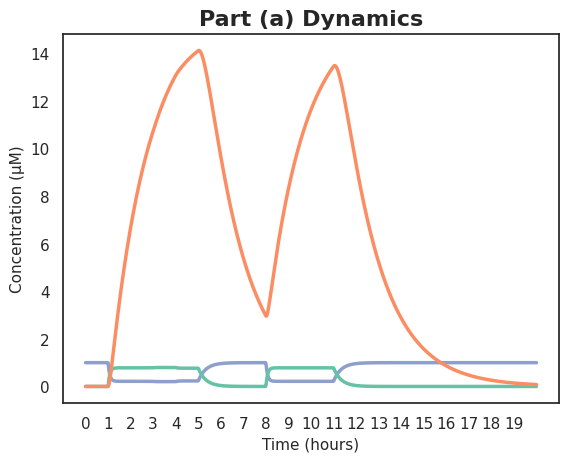

In [6]:
sns.set_theme(style="white")

labels = ['inactive promoter',
          'active promoter',
          'mRNA transcript']
colors = ['#8DA0CB',   #blue
          '#66C2A5',   #mint green
          '#FC8D62']   #orange


for i in range(3):
    plt.plot(t/60, solution[:, i], linewidth=2.5, color=colors[i], label=labels[i])

plt.xlabel('Time (hours)', fontsize=11)
plt.ylabel('Concentration (µM)', fontsize=11)
plt.title('Part (a) Dynamics', fontsize=16, weight='bold')
plt.xticks(np.arange(0, 20, step=1))
plt.legend(lineObjects, ('inactive promoter', 'active promoter', 'mRNA transcript'))
plt.show()

**The following blocks are for part (b)**


In [7]:
###################### (b) (NFkB || AP1) && IRF ######################

#OR gate gene expression model
def OR_model(states, t):
    # Our "states" list has the state variables in the following order:
    # pr, pr_a, tr (inactive promoter, active promoter, and mRNA transcript)
    pr = states[0]
    pr_a = states[1]
    tr = states[2]

    # NFKB (transcription factor) dynamics
    if (t > NFKB_on and t < NFKB_off) or (t > NFKB2_on and t < NFKB2_off):
        NFKB = NFKB_amp
    else:
        NFKB = 0

    # AP1 (transcription factor) dynamics
    if (t > AP1_on and t < AP1_off) or (t > AP1_2on and t < AP1_2off):
        AP1 = AP1_amp
    else:
        AP1 = 0

    # IRF (transcription factor) dynamics
    if t > IRF_on and t < IRF_off:
        IRF = IRF_amp
    else:
        IRF = 0

    # Hill function
    H1 = 1 - ((1 - (NFKB/(NFKB + Kd1)))*(1 - (AP1/(AP1 + Kd2))))
    H2 = IRF/(IRF + Kd3)
    H = H1 * H2

    # Change equations
    pr_prime =      -k_a*H*pr   +k_d*pr_a
    pr_a_prime =    +k_a*H*pr   -k_d*pr_a
    tr_prime =      +k_syn*pr_a -k_deg*tr

    statesprime = [pr_prime, pr_a_prime, tr_prime]
    return statesprime


In [8]:
#Adjust these measures to model situations in part (b)

#initial conditions
pr0 = 1
pr_a0 = 0
tr0 = 0
states0 = [pr0, pr_a0, tr0]

#parameters
k_a = 0.2
k_d = 0.05
Kd1 = 0.1
Kd2 = 0.1
Kd3 = 0.1
k_syn = 0.2
k_deg = 0.01

#NFKB activation
NFKB_on = 60
NFKB_off = 60*4
NFKB_amp = 1
NFKB2_on = 60*8
NFKB2_off = 60*11

#AP1 activation
AP1_on = 60*2
AP1_off = 60*5
AP1_amp = 1
AP1_2on = 60*11
AP1_2off = 60*14

#IRF activation
IRF_on = 60*3
IRF_off = 60*9
IRF_amp = 1


In [9]:
t = np.linspace(0,1200,1000)
solution = odeint(OR_model,states0,t)

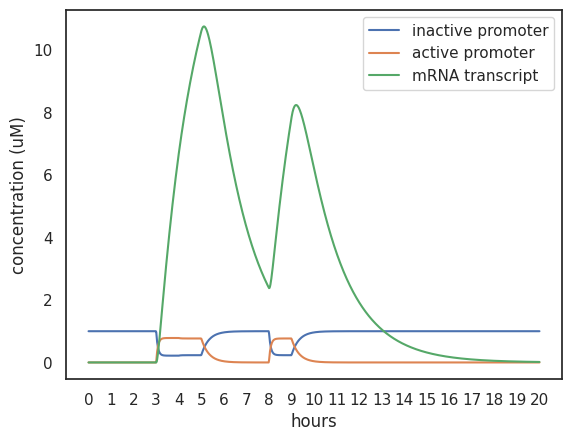

In [10]:
#Plot Dynamics - OR model
lineObjects=plt.plot(t/60, solution)
plt.xlabel('hours')
plt.ylabel('concentration (uM)')
plt.xticks(np.arange(0, 21, step=1))
plt.legend(lineObjects, ('inactive promoter', 'active promoter', 'mRNA transcript'))

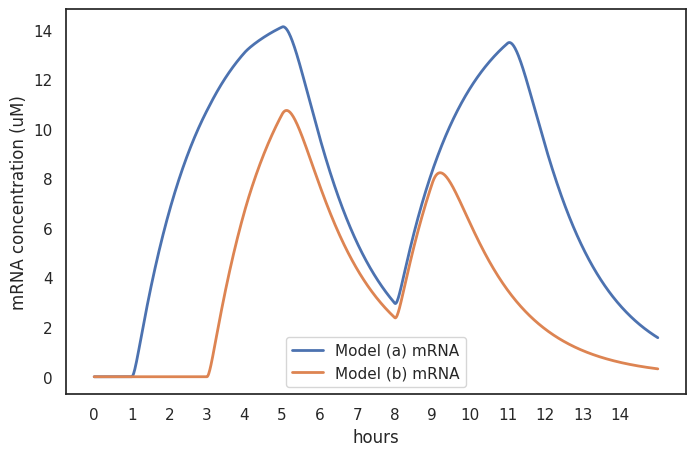

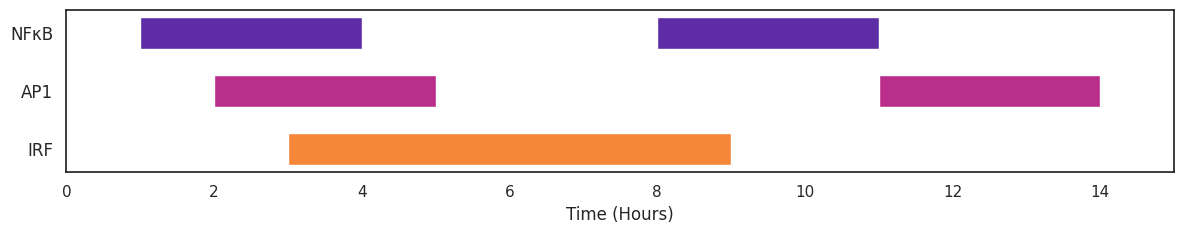

In [11]:
################## Figure 2 plotting ################
t = np.linspace(0, 900, 1000)
sol_AND = odeint(AND_model, states0, t)
mRNA_AND = sol_AND[:, 2]

sol_OR = odeint(OR_model, states0, t)
mRNA_OR = sol_OR[:, 2]

# Top panel
plt.figure(figsize=(8,5))
plt.plot(t/60, mRNA_AND, label='Model (a) mRNA', linewidth=2)
plt.plot(t/60, mRNA_OR, label='Model (b) mRNA', linewidth=2)

plt.xlabel('hours')
plt.ylabel('mRNA concentration (uM)')
plt.xticks(np.arange(0, 15, step=1))
plt.legend()


# Bottom panel
NFkB_windows = [(1, 4), (8, 11)]
AP1_windows  = [(2, 5), (11, 14)]
IRF_windows  = [(3, 9)]
NFkB_color = "#5e2ca5"
AP1_color  = "#b82e8a"
IRF_color  = "#f6863a"

fig, ax = plt.subplots(figsize=(12, 2.5))

def plot_windows(windows, y, color):
    for (start, end) in windows:
        ax.barh(y, end - start, left=start, height=0.55, color=color)


plot_windows(NFkB_windows, 2, NFkB_color)
plot_windows(AP1_windows,  1, AP1_color)
plot_windows(IRF_windows,  0, IRF_color)


ax.set_yticks([2, 1, 0])
ax.set_yticklabels(["NFκB", "AP1", "IRF"], fontsize=12)


ax.set_xlabel("Time (Hours)", fontsize=12)
ax.set_xlim(0, 15)

plt.tight_layout()








In [91]:
################## Figure 3 plotting ################

TF_amps = [0.1, 0.5, 1.0]
ULTIMATE_MAX = 15.948764030685542 #Calculated above, where mRNA steady state is reached


def get_steady_state_mRNA(model_func, N_amp, A_amp, I_amp):
    global NFKB_amp, AP1_amp, IRF_amp
    NFKB_amp = N_amp
    AP1_amp = A_amp
    IRF_amp = I_amp

    # mRNA plateaus well before 1200
    t = np.linspace(0, 1200, 1000)
    sol = odeint(model_func, [1, 0, 0], t)

    mRNA = sol[:, 2]
    steady_state = mRNA[-1]
    return steady_state, max_mRNA

print(get_steady_state_mRNA(AND_model, 1, 1, 1))


def make_heatmap_matrix(model_func, fixed_amp, fixed_TF="N"):

    # All will have values varied between 0 and 1 in intervals of .1
    N_range   = np.linspace(0, 1.0, 11)
    AP1_range = np.linspace(0, 1.0, 11)
    IRF_range = np.linspace(0, 1.0, 11)

    # axes based on which TF we are looking at
    if fixed_TF == "N":
        x_vals = AP1_range
        y_vals = IRF_range
    elif fixed_TF == "A":
        x_vals = IRF_range
        y_vals = N_range
    elif fixed_TF == "I":
        x_vals = AP1_range
        y_vals = N_range

    # Initialize matrix
    matrix = np.zeros((len(y_vals), len(x_vals)))

    # Fill the matrix in
    for i, y in enumerate(y_vals):
        for j, x in enumerate(x_vals):

            if fixed_TF == "N":
                ss, _ = get_steady_state_mRNA(model_func, fixed_amp, x, y)

            elif fixed_TF == "A":
                ss, _ = get_steady_state_mRNA(model_func, y, fixed_amp, x)

            elif fixed_TF == "I":
                ss, _ = get_steady_state_mRNA(model_func, y, x, fixed_amp)

            matrix[i, j] = (ss / ULTIMATE_MAX) * 100

    return matrix, x_vals, y_vals









(np.float64(15.948764030685542), np.float64(15.948764030685542))


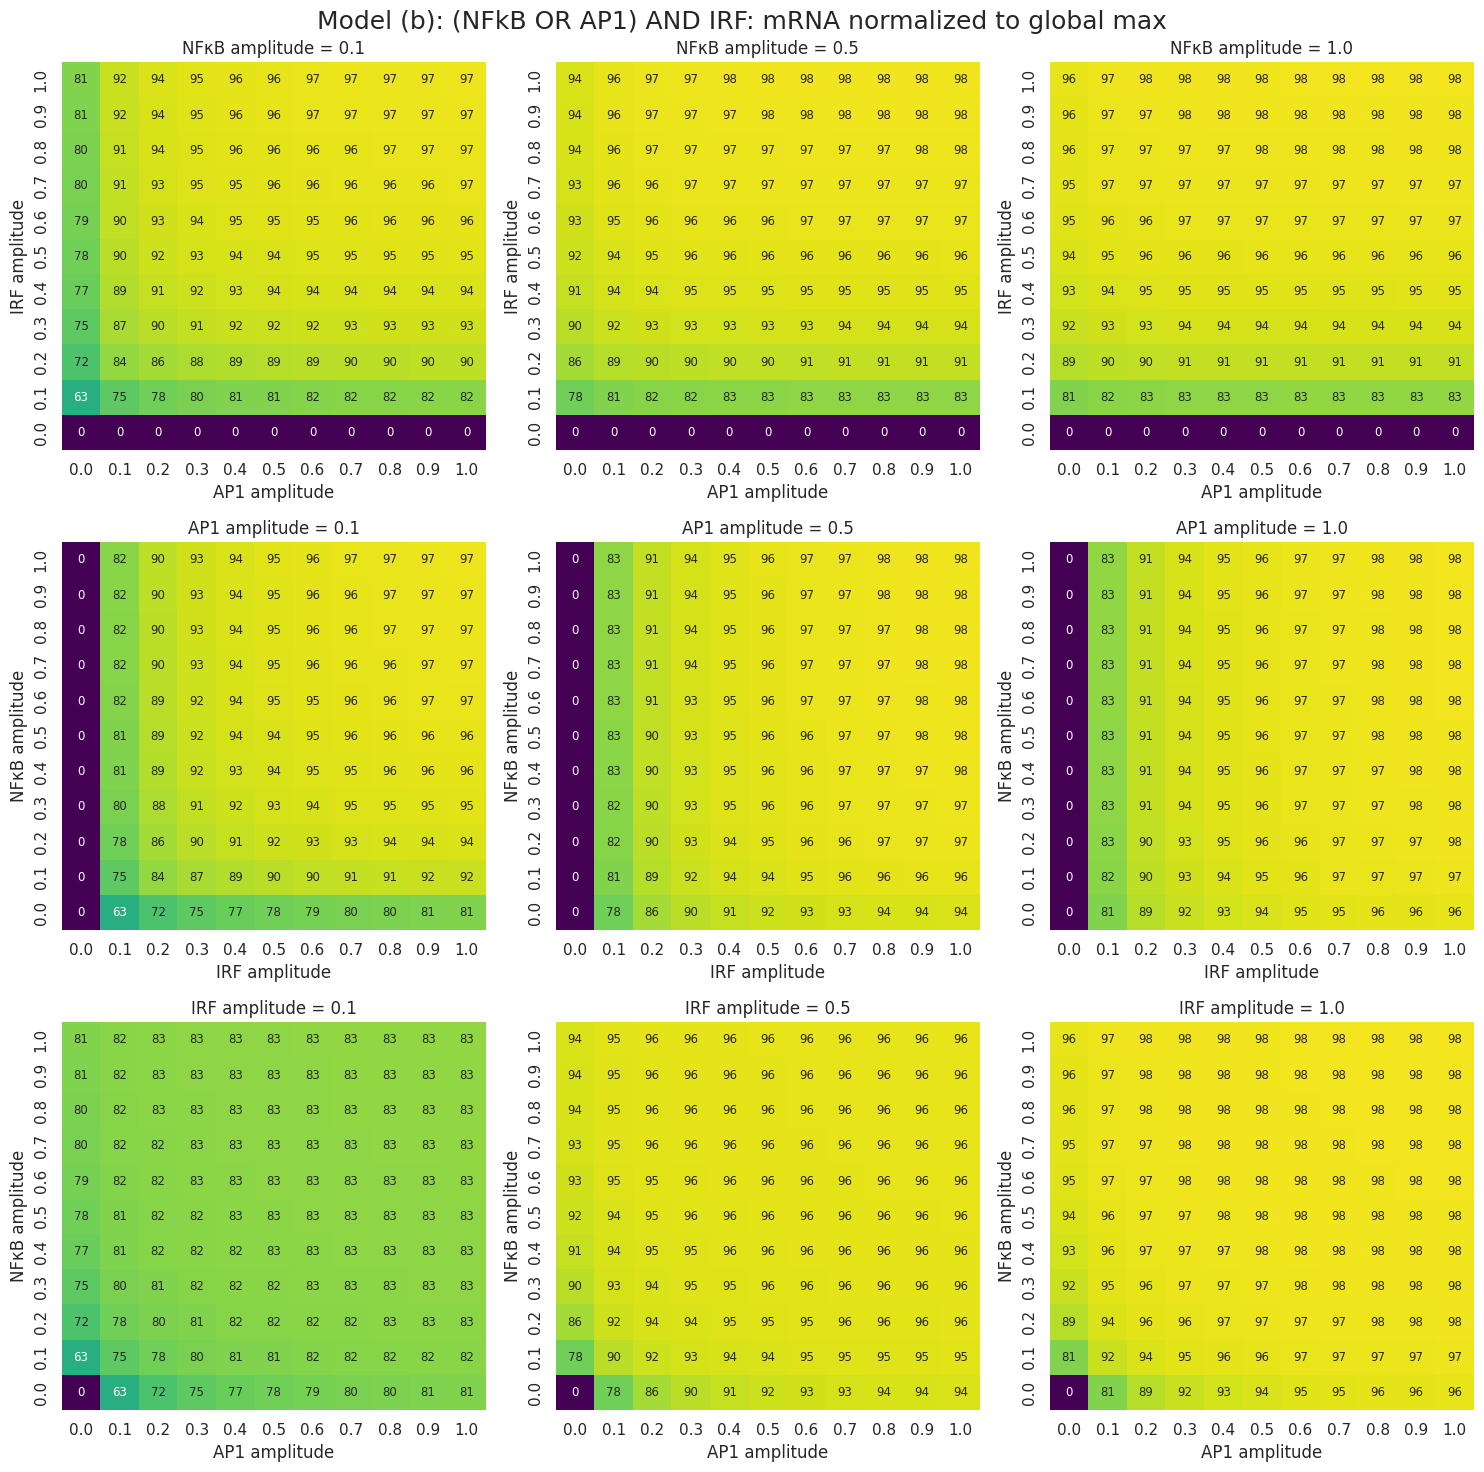

In [112]:
def plot_all_heatmaps(model_func, title_prefix="Model"):
    TF_amps = [0.1, 0.5, 1.0]
    fixed_TFs = ["N", "A", "I"]
    TF_fullnames = {
    "N": "NFκB",
    "A": "AP1",
    "I": "IRF"}


    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    for row, fixed_TF in enumerate(fixed_TFs):
        for col, amp in enumerate(TF_amps):
            ax = axes[row, col]

            matrix, x_vals, y_vals = make_heatmap_matrix(model_func, amp, fixed_TF)

            sns.heatmap(
              matrix,
              ax=ax,
              cmap="viridis",
              annot=True,
              annot_kws={"size": 8.5},
              fmt =".0f",
              cbar=False,
              vmin = 0,
              vmax = 100,
              xticklabels=[f"{v:.1f}" for v in x_vals],
              yticklabels=[f"{v:.1f}" for v in y_vals]
              )

            # Put (0,0) in bottom-left
            ax.invert_yaxis()

            if fixed_TF == "N":
                ax.set_xlabel("AP1 amplitude")
                ax.set_ylabel("IRF amplitude")

            elif fixed_TF == "A":
                ax.set_xlabel("IRF amplitude")
                ax.set_ylabel("NFκB amplitude")

            elif fixed_TF == "I":
                ax.set_xlabel("AP1 amplitude")
                ax.set_ylabel("NFκB amplitude")

            full_name = TF_fullnames[fixed_TF]
            ax.set_title(f"{full_name} amplitude = {amp}")

    plt.suptitle(f"{title_prefix}: mRNA normalized to global max", fontsize=18)
    plt.tight_layout()

#plot_all_heatmaps(AND_model, title_prefix="Model (a): NFkB OR (AP1 AND IRF)")
plot_all_heatmaps(OR_model,  title_prefix="Model (b): (NFkB OR AP1) AND IRF")

In [104]:
################ Making figure 4 ###########################

def make_difference_matrix(amp, fixed_TF):
    # Same ranges as before
    N_range   = np.linspace(0, 1.0, 11)
    AP1_range = np.linspace(0, 1.0, 11)
    IRF_range = np.linspace(0, 1.0, 11)

    # Axes depend on which TF is being changed
    if fixed_TF == "N":
        x_vals = AP1_range
        y_vals = IRF_range
    elif fixed_TF == "A":
        x_vals = IRF_range
        y_vals = N_range
    elif fixed_TF == "I":
        x_vals = AP1_range
        y_vals = N_range

    diff_matrix = np.zeros((len(y_vals), len(x_vals)))

    # Fill matrix in
    for i, y in enumerate(y_vals):
        for j, x in enumerate(x_vals):

            # Steady state for AND model (a)
            ss_AND, _ = get_steady_state_mRNA(
                AND_model,
                *(  # unpack to correct TF order
                    (amp, x, y) if fixed_TF == "N" else
                    (y, amp, x) if fixed_TF == "A" else
                    (y, x, amp)
                )
            )

            # Steady state for OR model (b)
            ss_OR, _ = get_steady_state_mRNA(
                OR_model,
                *(
                    (amp, x, y) if fixed_TF == "N" else
                    (y, amp, x) if fixed_TF == "A" else
                    (y, x, amp)
                )
            )
            # take the difference between the AND and OR model (none will be negative because and model always makes more)
            diff_matrix[i, j] = ss_AND - ss_OR

    return diff_matrix, x_vals, y_vals


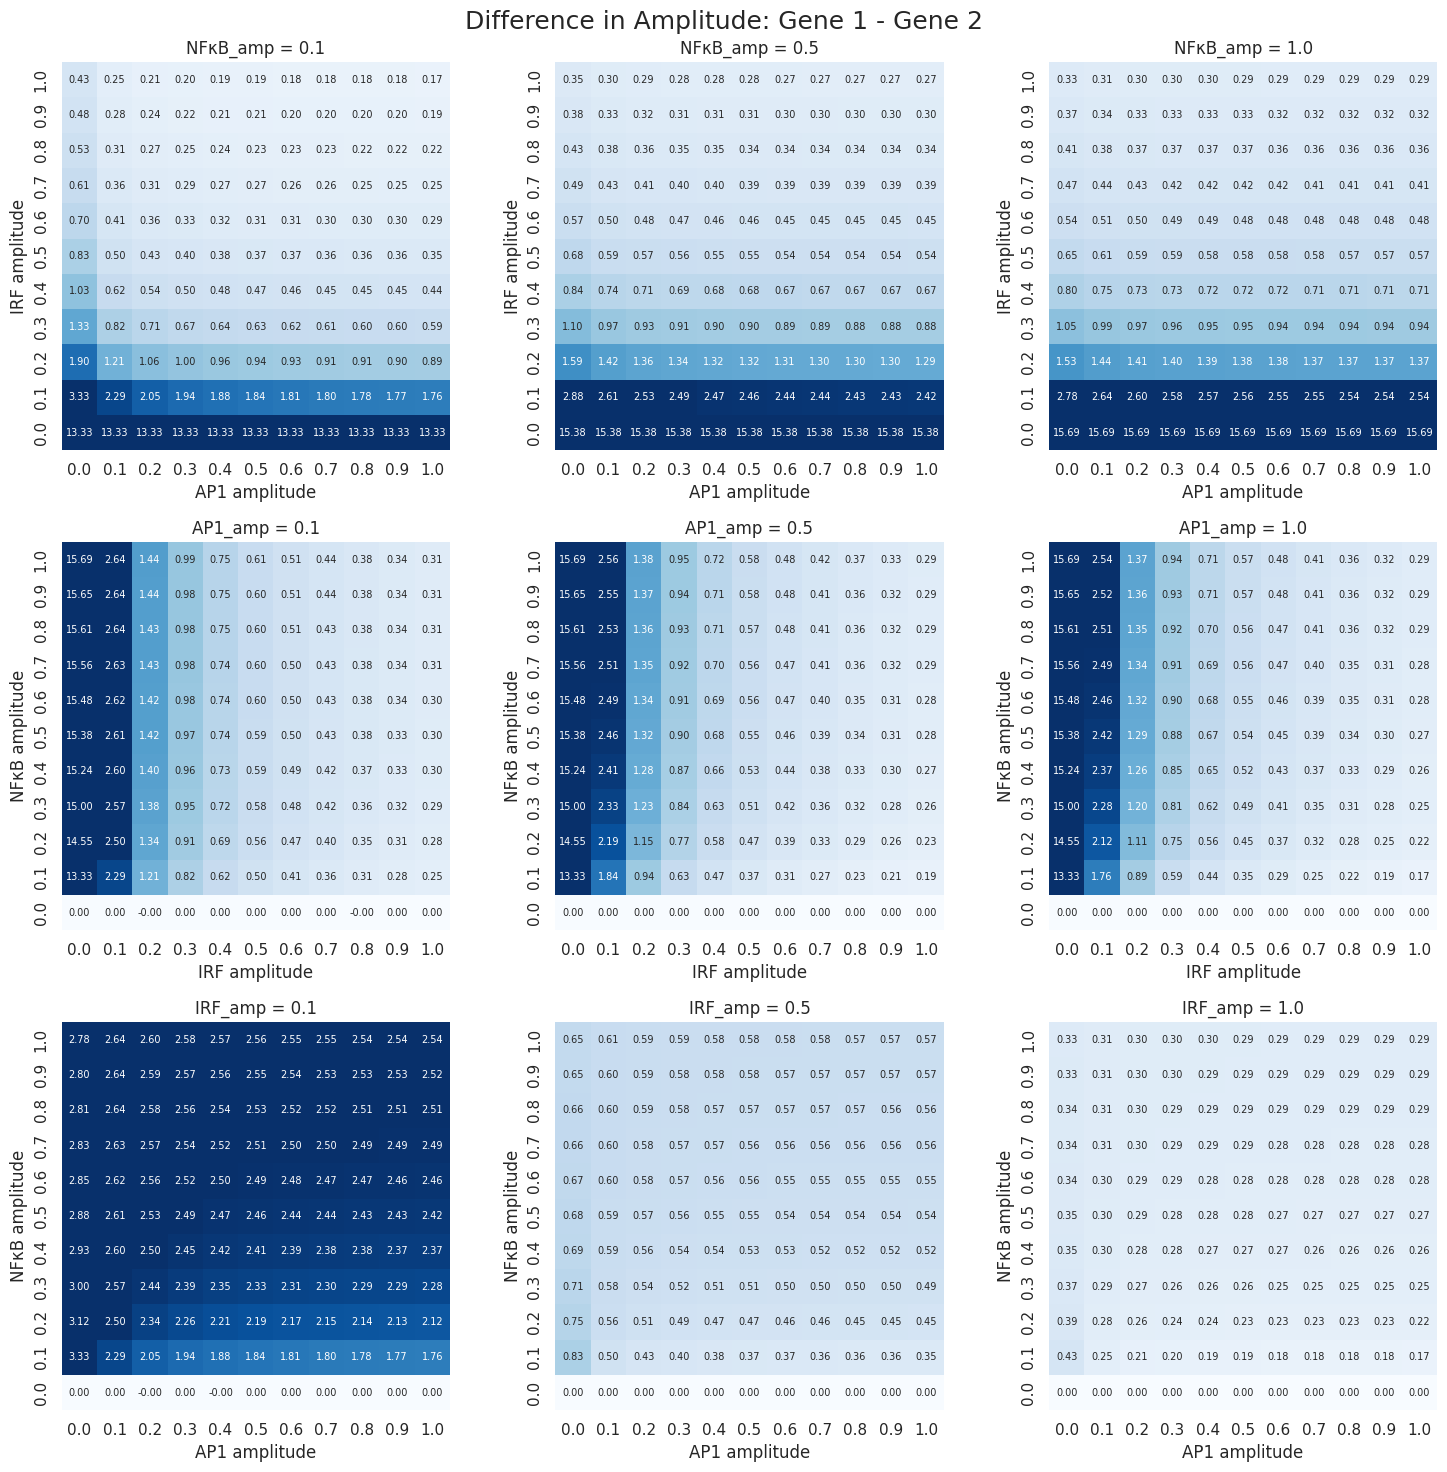

In [109]:

def plot_difference_figure():
    TF_amps = [0.1, 0.5, 1.0]
    fixed_TFs = ["N", "A", "I"]
    TF_fullnames = {"N": "NFκB", "A": "AP1", "I": "IRF"}

    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

  # For loop that goes through all the values in each matrix
    for r, fixed_TF in enumerate(fixed_TFs):
        for c, amp in enumerate(TF_amps):

            ax = axes[r, c]

            diff_matrix, x_vals, y_vals = make_difference_matrix(amp, fixed_TF)

            sns.heatmap(
                diff_matrix,
                ax=ax,
                cmap="Blues",
                vmin=0, vmax=2.5,
                annot=True,
                fmt=".2f",
                annot_kws={"size": 7},
                xticklabels=[f"{v:.1f}" for v in x_vals],
                yticklabels=[f"{v:.1f}" for v in y_vals],
                cbar=False
            )

            ax.invert_yaxis()
            ax.set_aspect('equal')

            ax.set_title(f"{TF_fullnames[fixed_TF]}_amp = {amp}")

            # Axes labels depend on TF
            if fixed_TF == "N":
                ax.set_xlabel("AP1 amplitude")
                ax.set_ylabel("IRF amplitude")
            elif fixed_TF == "A":
                ax.set_xlabel("IRF amplitude")
                ax.set_ylabel("NFκB amplitude")
            elif fixed_TF == "I":
                ax.set_xlabel("AP1 amplitude")
                ax.set_ylabel("NFκB amplitude")


    plt.suptitle("Difference in Amplitude: Gene 1 - Gene 2", fontsize=18)
    plt.tight_layout()

plot_difference_figure()
